In [3]:
# pip install matplotlib

  Using cached matplotlib-3.5.1-cp39-cp39-macosx_10_9_x86_64.whl (7.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 KB 343.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.5/899.5 KB 417.7 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 426.3 kB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Plot losses and token accuracy

In [178]:
history_dict = {}

In [242]:
def format_df(df, n_epochs, validation_set=True):
    """
    Format/summarize original batch_result.csv into performance per epoch.
    """
    if validation_set:
        df = df[["training_loss", "training_token_accuracy", "validation_loss", "validation_token_accuracy"]].fillna(method='ffill') # impute NAN with last valid value
    else:
        df = df[["training_loss", "training_token_accuracy"]]
    step = round((len(df)-1) / n_epochs) # if step = 50, 1 epoch will be completed every 50 steps.
    plot_df = df.iloc[::step]
    plot_df = plot_df.reset_index(drop=True)
    plot_df = plot_df.rename_axis('epoch').reset_index()

    return plot_df


def plot_losses_accuracy(formatted_df, validation_set=True):
    plt.plot(formatted_df["training_loss"], label="training loss") #color='#0097a7'
    if validation_set:
        plt.plot(formatted_df["validation_loss"], label="validation loss") #color='k'
    plt.xlabel("Epochs", fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel("Loss", fontsize=14)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.title("Loss", fontsize=16)
    plt.show()
    plt.close()

    plt.plot(formatted_df["training_token_accuracy"], label="training accuracy")
    if validation_set:
        plt.plot(formatted_df["validation_token_accuracy"], label="validation accuracy")
    plt.xlabel("Epochs", fontsize=14)
    plt.xticks(fontsize=12)
    plt.ylabel("Accuracy", fontsize=14)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.title("Accuracy", fontsize=16)
    plt.show()


def add_to_history(formatted_df, training_title):
    history = formatted_df.to_dict(orient='list')
    history_dict[training_title] = history
    
    return history_dict


def compare_histories(metric):
    for training_name, history in history_dict.items():
        if metric in history:
            plt.plot(history[metric], label=training_name)
            plt.xlabel("Epochs", fontsize=14)
            plt.xticks(fontsize=12)
            plt.ylabel(metric, fontsize=14)
            plt.yticks(fontsize=12)
    plt.legend()
    plt.title(f"Comparison of {metric}", fontsize=16)
    plt.show()
    plt.close()

### Batch 1

Model : ada:ft-personal-2022-03-31-16-05-33

- corpus: Hamlet
- model='ada'
- n_training pairs=1000
- n_epochs=4
- batch_size=2
- learning_rate=unknown (0.5, 0.1 or 0.2)

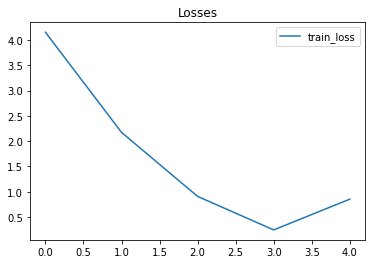

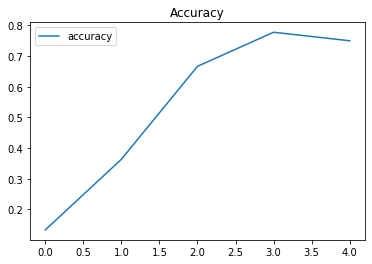

In [179]:
batch1_results = pd.read_csv('../data/results/batch1_results.csv', skiprows=[0])

batch1 = format_df(batch1_results, n_epochs=4, validation_set=False)
batch1_plot = plot_losses_accuracy(batch1, validation_set=False)
history = add_to_history(batch1, 'batch1')

### Batch 2

Model : ada:ft-personal-2022-04-01-20-43-48

- corpus: MacBeth + Hamlet
- model='ada'
- n_training pairs=4000
- n_validation pairs=1000
- n_epochs=10
- batch_size=80
- learning_rate=0.1

50 batches (80 * 50 = 4000)

10 epochs

every 50 step is 1 epoch. 10 epochs = 500 steps

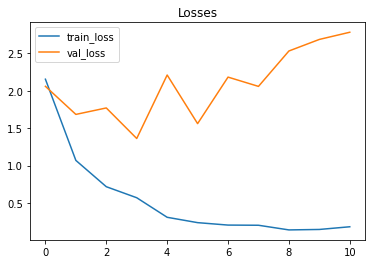

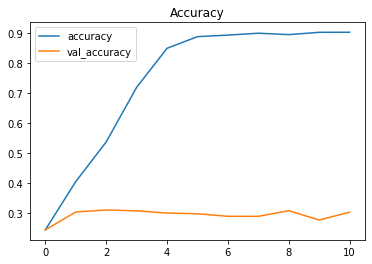

In [180]:
batch2_results = pd.read_csv('../data/results/batch2_results.csv', skiprows=[0])

batch2 = format_df(batch2_results, n_epochs=10)
batch2_plot = plot_losses_accuracy(batch2)
history = add_to_history(batch2, 'batch2')

### Batch 3
Model : curie:ft-personal-2022-04-02-10-04-46

- corpus: MacBeth + Hamlet
- model='curie'
- n_training pairs=4000
- n_validation pairs=1000
- n_epochs=10
- batch_size=80
- learning_rate=0.1

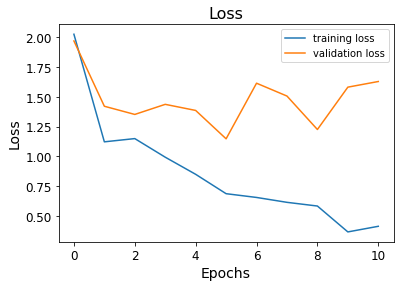

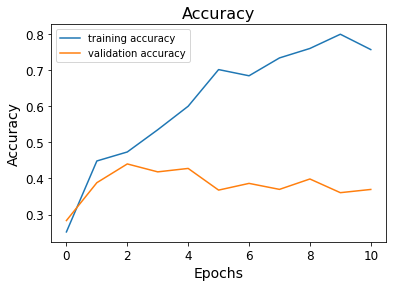

In [243]:
batch3_results = pd.read_csv('../data/results/batch3_results.csv', skiprows=[0])

batch3 = format_df(batch3_results, n_epochs=10)
batch3_plot = plot_losses_accuracy(batch3)
history = add_to_history(batch3, 'batch3')

### Compare losses across batches

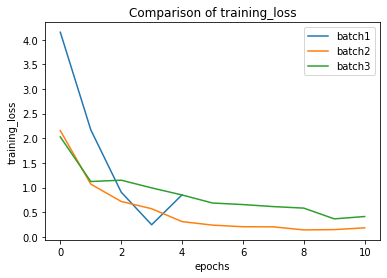

In [208]:
# metrics to compare
metrics = ["training_loss", "training_token_accuracy", "validation_loss", "validation_token_accuracy"]

compare_histories(metrics[0])